In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [26]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# building a classification model

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255. # convert to float from 0 to 1 range

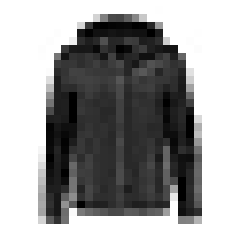

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

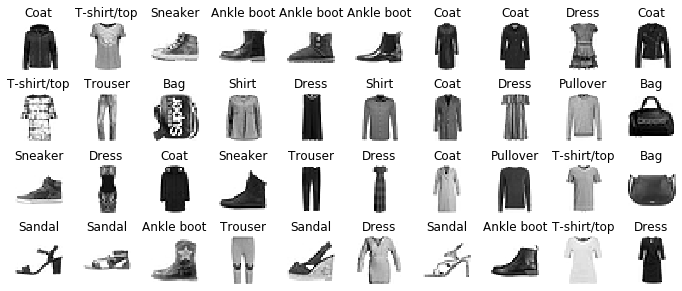

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [17]:
# sparse labels, exclusive class
# if labels were one-hot vectors, categorical_crossentropy would be used
# if binary classification, binary_crossentropy with sigmoid is used on the output
# to create one-hot vector, use keras.utils.to_categorical()
# to go the other way, use np.argmax() with axis=1
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 2s 31us/sample - loss: 0.4844 - accuracy: 0.8322 - val_loss: 0.4540 - val_accuracy: 0.8476
Epoch 3/30
55000/55000 [==============================] - 2s 27us/sample - loss: 0.4415 - accuracy: 0.8467 - val_loss: 0.4391 - val_accuracy: 0.8496
Epoch 4/30
55000/55000 [==============================] - 2s 28us/sample - loss: 0.4130 - accuracy: 0.8545 - val_loss: 0.4162 - val_accuracy: 0.8558
Epoch 5/30
55000/55000 [==============================] - 2s 28us/sample - loss: 0.3927 - accuracy: 0.8615 - val_loss: 0.3812 - val_accuracy: 0.8646
Epoch 6/30
55000/55000 [==============================] - 2s 32us/sample - loss: 0.3771 - accuracy: 0.8663 - val_loss: 0.3730 - val_accuracy: 0.8684
Epoch 7/30
55000/55000 [==============================] -

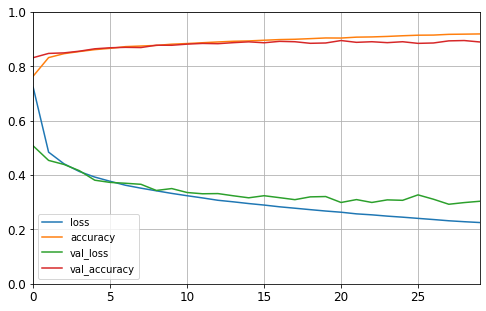

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 17us/sample - loss: 0.3364 - accuracy: 0.8792


[0.33641153327226636, 0.8792]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

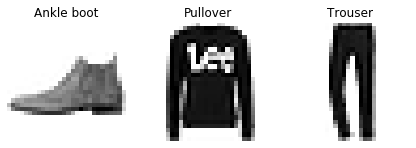

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [27]:
# regression problem

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 32us/sample - loss: 1.6205 - val_loss: 2.0374
Epoch 2/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.7162 - val_loss: 0.6571
Epoch 3/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6356 - val_loss: 0.5996
Epoch 4/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5989 - val_loss: 0.5662
Epoch 5/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5713 - val_loss: 0.5489
Epoch 6/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5491 - val_loss: 0.5204
Epoch 7/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5301 - val_loss: 0.5018
Epoch 8/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5142 - val_loss: 0.4815
Epoch 9/20
11610/11610 [==============================] - 0s 20us/sample - loss: 0.5004 - val_l

In [33]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 12us/sample - loss: 0.4218


0.421771262274232

In [34]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

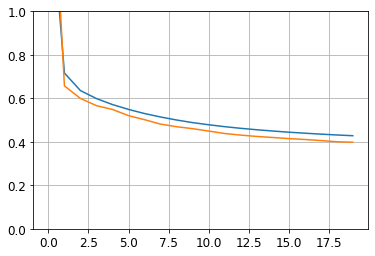

In [31]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
y_pred

array([[0.37310064],
       [1.6790789 ],
       [3.0817137 ]], dtype=float32)

In [35]:
# functional api for more complex setup
# wide and deep networks

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2]) # connect input to hidden2
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [39]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 35us/sample - loss: 1.2390 - val_loss: 0.6566
Epoch 2/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6312 - val_loss: 0.6734
Epoch 3/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5886 - val_loss: 0.5574
Epoch 4/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5595 - val_loss: 0.5235
Epoch 5/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5361 - val_loss: 0.5011
Epoch 6/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5178 - val_loss: 0.5065
Epoch 7/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5016 - val_loss: 0.4699
Epoch 8/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4888 - val_loss: 0.4745
Epoch 9/20
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4772 - val_l

In [40]:
# sending different subsets of input features through wide or deep paths
# in this example, 5 features and 6 features are split

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [43]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.8127 - val_loss: 2.1165
Epoch 2/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6852 - val_loss: 0.6178
Epoch 3/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5965 - val_loss: 0.5600
Epoch 4/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5587 - val_loss: 0.5269
Epoch 5/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5321 - val_loss: 0.5185
Epoch 6/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5129 - val_loss: 0.4803
Epoch 7/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.4959 - val_loss: 0.4689
Epoch 8/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.4837 - val_loss: 0.4498
Epoch 9/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4734 - val_l

In [49]:
# auxillary output
# maybe you want to locate and classify an object in picture at the same time
# you could train independent networks, but usually get better result by doing multiple

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [47]:
# each output needs its own loss function
# we care more about the main one so we give more weight to the main one (0.9)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [48]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 49us/sample - loss: 2.1346 - main_output_loss: 1.9194 - aux_output_loss: 4.0632 - val_loss: 2.9120 - val_main_output_loss: 2.2555 - val_aux_output_loss: 8.8088
Epoch 2/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.8954 - main_output_loss: 0.7048 - aux_output_loss: 2.6119 - val_loss: 1.4135 - val_main_output_loss: 0.6348 - val_aux_output_loss: 8.4172
Epoch 3/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.7400 - main_output_loss: 0.6077 - aux_output_loss: 1.9305 - val_loss: 1.3594 - val_main_output_loss: 0.5885 - val_aux_output_loss: 8.2925
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.6749 - main_output_loss: 0.5690 - aux_output_loss: 1.6264 - val_loss: 1.2789 - val_main_output_loss: 0.5611 - val_aux_output_loss: 7.7340
Epoch 5/20
11610/11610 [==============================] - 0s 25us/s

In [50]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/5160 [==============================] - 0s 14us/sample - loss: 0.4656 - main_output_loss: 0.4165 - aux_output_loss: 0.9111


In [51]:
# you can write imperatively

In [52]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [53]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 55us/sample - loss: 2.2719 - output_1_loss: 2.1554 - output_2_loss: 3.3117 - val_loss: 4.3377 - val_output_1_loss: 2.7732 - val_output_2_loss: 18.3999
Epoch 2/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.9891 - output_1_loss: 0.8653 - output_2_loss: 2.1062 - val_loss: 2.0073 - val_output_1_loss: 0.7581 - val_output_2_loss: 13.2427
Epoch 3/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.8320 - output_1_loss: 0.7303 - output_2_loss: 1.7468 - val_loss: 1.7215 - val_output_1_loss: 0.7114 - val_output_2_loss: 10.8051
Epoch 4/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.7658 - output_1_loss: 0.6760 - output_2_loss: 1.5726 - val_loss: 1.4708 - val_output_1_loss: 0.6454 - val_output_2_loss: 8.8938
Epoch 5/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.7223 - output_1_loss:

In [54]:
# saving and restoring a model

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [57]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 34us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4576 - val_l

In [58]:
model.save("my_keras_model.h5")

In [59]:
model = keras.models.load_model("my_keras_model.h5")

In [60]:
model.predict(X_new)

array([[0.551559 ],
       [1.6555369],
       [3.0014234]], dtype=float32)

In [61]:
model.save_weights("my_keras_weights.ckpt")

In [62]:
model.load_weights("my_keras_weights.ckpt")

In [63]:
# you can use callbacks to save checkpoints

In [64]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 34us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4576 - val_l

In [68]:
# you can early stop as well
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4385 - val_loss: 0.4287
Epoch 2/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4319 - val_loss: 0.4117
Epoch 3/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4252 - val_loss: 0.3975
Epoch 4/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4199 - val_loss: 0.3943
Epoch 5/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4150 - val_loss: 0.3964
Epoch 6/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4110 - val_loss: 0.3907
Epoch 7/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4070 - val_loss: 0.3823
Epoch 8/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4036 - val_loss: 0.3786
Epoch 9/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.400

Epoch 76/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3341 - val_loss: 0.3196
Epoch 77/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3338 - val_loss: 0.3608
Epoch 78/100
11610/11610 [==============================] - 0s 20us/sample - loss: 0.3336 - val_loss: 0.3295
Epoch 79/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3331 - val_loss: 0.3927
Epoch 80/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3332 - val_loss: 0.3167
Epoch 81/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3317 - val_loss: 0.3783
Epoch 82/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3322 - val_loss: 0.3154
Epoch 83/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3315 - val_loss: 0.3538
Epoch 84/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3312 - val_loss: 0.3282
Epoch 85/100
11610/

In [69]:
# custom callback
# you can implement
# on_train_begin(), on_train_end()
# on_epoch_begin(), on_epoch_end()
# on_batch_begin(), on_batch_end()

# for evaluation you should implement
# on_test_begin(), on_test_end()
# on_test_batch_begin(), or on_test_batch_end()
                                               
# for prediction
# on_predict_begin(), on_predict_end()
# on_predict_batch_begin(), on_predict_batch_end()
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [70]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
 8480/11610 [====================>.........] - ETA: 0s - loss: 0.3206
val/train: 1.16
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3256 - val_loss: 0.3785


In [71]:
# using tensorboard for visualization

In [72]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [73]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_04_29-02_28_49'

In [74]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [75]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [76]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 46us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/30
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/30
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/30
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/30
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4576 - val_l

In [77]:
# do this or do below: tensorboard --logdir=./my_logs --port=6006

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [78]:
# hyperparameter tuning

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [81]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [82]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 32us/sample - loss: 1.1399 - val_loss: 24.4309
Epoch 2/100
11610/11610 [==============================] - 0s 20us/sample - loss: 0.7393 - val_loss: 3.2896
Epoch 3/100
11610/11610 [==============================] - 0s 20us/sample - loss: 0.5374 - val_loss: 0.6080
Epoch 4/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4796 - val_loss: 0.4532
Epoch 5/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4536 - val_loss: 0.4221
Epoch 6/100
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4373 - val_loss: 0.4144
Epoch 7/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4256 - val_loss: 0.4025
Epoch 8/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4178 - val_loss: 0.3938
Epoch 9/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.41

In [83]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.3464


In [84]:
y_pred = keras_reg.predict(X_new)

In [85]:
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
  32/7740 [..............................] - ETA: 23s - loss: 6.73

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 0s 37us/sample - loss: 3.5574 - val_loss: 1.8536
Epoch 2/100
7740/7740 [==============================] - 0s 22us/sample - loss: 1.3316 - val_loss: 0.9380
Epoch 3/100
7740/7740 [==============================] - 0s 21us/sample - loss: 0.8573 - val_loss: 0.8545
Epoch 4/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.7344 - val_loss: 0.9545
Epoch 5/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.6943 - val_loss: 0.7248
Epoch 6/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.6682 - val_loss: 0.7356
Epoch 7/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.6494 - val_loss: 0.9732
Epoch 8/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.6408 - val_loss: 0.6175
Epoch 9/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.6256 - val_loss: 0.5877
Epoch 10/100
7740/7740 [==============================] - 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


7740/7740 [==============================] - 0s 37us/sample - loss: 3.5541 - val_loss: 23.2063
Epoch 2/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.4756 - val_loss: 10.9096
Epoch 3/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.0159 - val_loss: 4.5194
Epoch 4/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.8738 - val_loss: 1.5793
Epoch 5/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.8034 - val_loss: 0.7218
Epoch 6/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.7549 - val_loss: 1.1511
Epoch 7/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.7166 - val_loss: 2.3325
Epoch 8/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.6854 - val_loss: 3.9493
Epoch 9/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.6593 - val_loss: 5.7393
Epoch 10/100
7740/7740 [==============================] 

7740/7740 [==============================] - 0s 24us/sample - loss: 0.5027 - val_loss: 20.9402
Epoch 17/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.5022 - val_loss: 20.5891
Epoch 18/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.5031 - val_loss: 20.7123
Epoch 19/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.5014 - val_loss: 17.3551
Epoch 20/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.5013 - val_loss: 20.4442
Epoch 21/100
3870/3870 [==============================] - 0s 10us/sample - loss: 1.0074
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   4.0s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.4056 - val_loss: 28.7777
Epoch 2/100
7740/7740 [==============================] - 0s 23us/sample - los

7740/7740 [==============================] - 0s 24us/sample - loss: 0.3700 - val_loss: 0.3698
Epoch 56/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3691 - val_loss: 0.3854
Epoch 57/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3682 - val_loss: 0.3874
Epoch 58/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3670 - val_loss: 0.3942
Epoch 59/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3663 - val_loss: 0.3821
Epoch 60/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3654 - val_loss: 0.3882
Epoch 61/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3644 - val_loss: 0.3779
Epoch 62/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3634 - val_loss: 0.3693
Epoch 63/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3628 - val_loss: 0.3734
Epoch 64/100
7740/7740 [==========================

Epoch 29/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4152 - val_loss: 0.4260
Epoch 30/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4125 - val_loss: 0.4350
Epoch 31/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4099 - val_loss: 0.4413
Epoch 32/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4076 - val_loss: 0.4439
Epoch 33/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4052 - val_loss: 0.4513
Epoch 34/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4029 - val_loss: 0.4671
Epoch 35/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4010 - val_loss: 0.4686
Epoch 36/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3988 - val_loss: 0.4745
Epoch 37/100
3870/3870 [==============================] - 0s 11us/sample - loss: 0.4098
[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n

7740/7740 [==============================] - 0s 24us/sample - loss: 0.8942 - val_loss: 4.2789
Epoch 4/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.8105 - val_loss: 3.3544
Epoch 5/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7686 - val_loss: 2.6742
Epoch 6/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7406 - val_loss: 2.2971
Epoch 7/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7187 - val_loss: 2.0216
Epoch 8/100
7740/7740 [==============================] - ETA: 0s - loss: 0.692 - 0s 24us/sample - loss: 0.7000 - val_loss: 1.7849
Epoch 9/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6825 - val_loss: 1.5810
Epoch 10/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6676 - val_loss: 1.4502
Epoch 11/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6530 - val_loss: 1.3239
Epoch 12/100
7740/7740 [========

Epoch 5/100
7740/7740 [==============================] - 0s 24us/sample - loss: 1.1658 - val_loss: 20.2997
Epoch 6/100
7740/7740 [==============================] - 0s 24us/sample - loss: 1.0236 - val_loss: 14.4998
Epoch 7/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.9247 - val_loss: 10.3206
Epoch 8/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.8582 - val_loss: 7.2174
Epoch 9/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.8127 - val_loss: 5.0609
Epoch 10/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7805 - val_loss: 3.8504
Epoch 11/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7553 - val_loss: 2.6823
Epoch 12/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7345 - val_loss: 1.9608
Epoch 13/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7165 - val_loss: 1.5395
Epoch 14/100
7740/7740 [===============

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4334 - val_loss: 0.4516
Epoch 50/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4319 - val_loss: 0.4455
Epoch 51/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4304 - val_loss: 0.4405
Epoch 52/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4292 - val_loss: 0.4437
Epoch 53/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4277 - val_loss: 0.4417
Epoch 54/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4266 - val_loss: 0.4433
Epoch 55/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4252 - val_loss: 0.4468
Epoch 56/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4241 - val_loss: 0.4536
Epoch 57/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4228 - val_loss: 0.4470
Epoch 58/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 23us/sample - loss: 0.3429 - val_loss: 0.3633
Epoch 21/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3408 - val_loss: 0.3366
Epoch 22/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3400 - val_loss: 0.3583
Epoch 23/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3397 - val_loss: 0.3759
Epoch 24/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3373 - val_loss: 0.3592
Epoch 25/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3364 - val_loss: 0.3754
Epoch 26/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3354 - val_loss: 0.3558
Epoch 27/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3343 - val_loss: 0.3720
Epoch 28/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3324 - val_loss: 0.3559
Epoch 29/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 23us/sample - loss: 0.3438 - val_loss: 0.3555
Epoch 47/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3457 - val_loss: 0.3562
Epoch 48/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3399 - val_loss: 0.3606
Epoch 49/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3391 - val_loss: 0.3702
Epoch 50/100
3870/3870 [==============================] - 0s 10us/sample - loss: 0.3416
[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   9.0s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 44us/sample - loss: 4.0249 - val_loss: 8.1049
Epoch 2/100
7740/7740 [==============================] - 0s 24us/sample - loss: 2.3117 - val_loss: 7.7845
Epoch 3/100
7740/7740 [==============================] - 0s 24us/sample - loss: 1.63

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4282 - val_loss: 0.4172
Epoch 71/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4260 - val_loss: 0.4151
Epoch 72/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4243 - val_loss: 0.4132
Epoch 73/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4224 - val_loss: 0.4112
Epoch 74/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4204 - val_loss: 0.4092
Epoch 75/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4188 - val_loss: 0.4074
Epoch 76/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4170 - val_loss: 0.4056
Epoch 77/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4152 - val_loss: 0.4039
Epoch 78/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4135 - val_loss: 0.4026
Epoch 79/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.6152 - val_loss: 0.5853
Epoch 16/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.6072 - val_loss: 0.5758
Epoch 17/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5993 - val_loss: 0.5672
Epoch 18/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5916 - val_loss: 0.5599
Epoch 19/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5842 - val_loss: 0.5519
Epoch 20/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5769 - val_loss: 0.5446
Epoch 21/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5698 - val_loss: 0.5376
Epoch 22/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5628 - val_loss: 0.5309
Epoch 23/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5559 - val_loss: 0.5241
Epoch 24/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 22us/sample - loss: 0.3988 - val_loss: 0.4753
Epoch 14/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3943 - val_loss: 0.5508
Epoch 15/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3902 - val_loss: 0.5443
Epoch 16/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3896 - val_loss: 0.6561
Epoch 17/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3867 - val_loss: 0.6874
Epoch 18/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3837 - val_loss: 0.7188
Epoch 19/100
3870/3870 [==============================] - 0s 10us/sample - loss: 0.3968
[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   3.6s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.

7740/7740 [==============================] - 0s 21us/sample - loss: 1.0921 - val_loss: 20.0378
Epoch 11/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.9744 - val_loss: 19.9971
Epoch 12/100
7740/7740 [==============================] - 0s 21us/sample - loss: 0.8855 - val_loss: 19.9839
Epoch 13/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.8178 - val_loss: 19.9964
Epoch 14/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.7659 - val_loss: 20.0215
Epoch 15/100
7740/7740 [==============================] - 0s 21us/sample - loss: 0.7260 - val_loss: 20.0579
Epoch 16/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.6950 - val_loss: 20.1105
Epoch 17/100
7740/7740 [==============================] - 0s 21us/sample - loss: 0.6709 - val_loss: 20.1648
Epoch 18/100
7740/7740 [==============================] - 0s 21us/sample - loss: 0.6518 - val_loss: 20.2247
Epoch 19/100
7740/7740 [=================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.3332 - val_loss: 0.3516
Epoch 35/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3315 - val_loss: 0.3521
Epoch 36/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3310 - val_loss: 0.3373
Epoch 37/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3300 - val_loss: 0.3442
Epoch 38/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3284 - val_loss: 0.3440
Epoch 39/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3280 - val_loss: 0.3466
Epoch 40/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3275 - val_loss: 0.3503
Epoch 41/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3269 - val_loss: 0.3352
Epoch 42/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3261 - val_loss: 0.3405
Epoch 43/100
3870/3870 [==========================

7740/7740 [==============================] - 0s 23us/sample - loss: 0.3354 - val_loss: 0.3228
Epoch 45/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3324 - val_loss: 0.4816
Epoch 46/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3331 - val_loss: 0.4228
Epoch 47/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3331 - val_loss: 0.6872
Epoch 48/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3319 - val_loss: 0.3177
Epoch 49/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3295 - val_loss: 0.6891
Epoch 50/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3376 - val_loss: 0.5869
Epoch 51/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3310 - val_loss: 0.5921
Epoch 52/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3296 - val_loss: 0.4285
Epoch 53/100
7740/7740 [==========================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.3min finished


11610/11610 [==============================] - 0s 34us/sample - loss: 1.0377 - val_loss: 7.6220
Epoch 2/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5969 - val_loss: 0.9913
Epoch 3/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4811 - val_loss: 0.5397
Epoch 4/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4390 - val_loss: 0.4682
Epoch 5/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4160 - val_loss: 0.4983
Epoch 6/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4016 - val_loss: 0.4798
Epoch 7/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3904 - val_loss: 0.4129
Epoch 8/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3833 - val_loss: 0.3919
Epoch 9/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3763 - val_loss: 0.4254
Epoch 10/100
11610/11610 [==============

11610/11610 [==============================] - 0s 21us/sample - loss: 0.2967 - val_loss: 0.3259
Epoch 77/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2962 - val_loss: 0.3409
Epoch 78/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2952 - val_loss: 0.2925
Epoch 79/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2949 - val_loss: 0.3667
Epoch 80/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2948 - val_loss: 0.2954
Epoch 81/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2931 - val_loss: 0.3468
Epoch 82/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2951 - val_loss: 0.3064
Epoch 83/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2932 - val_loss: 0.3054
Epoch 84/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.2924 - val_loss: 0.3041
Epoch 85/100
11610/11610 [======

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002160972CB88>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000216099BAC08>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [87]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [88]:
rnd_search_cv.best_score_

-0.35952892616378346

In [89]:
rnd_search_cv.best_estimator_

In [90]:
rnd_search_cv.score(X_test, y_test)

5160/5160 [==============================] - 0s 11us/sample - loss: 0.3065


-0.30652404945026074

In [91]:
model = rnd_search_cv.best_estimator_.model
model

In [92]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 11us/sample - loss: 0.3065


0.30652404945026074

In [93]:
# using NN for MNIST dataset

In [94]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [95]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

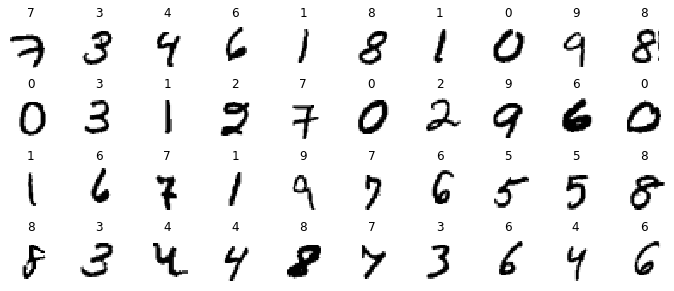

In [96]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [97]:
X_valid.shape

(5000, 28, 28)

In [98]:
X_test.shape

(10000, 28, 28)

In [99]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [102]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [103]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 3s 47us/sample - loss: nan - accuracy: 0.5818 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

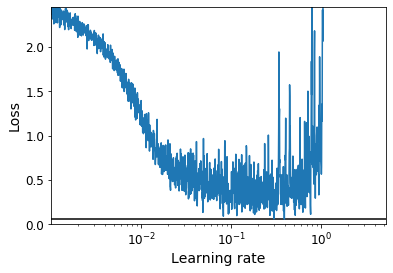

In [104]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [105]:
# the loss is shooting up at 3e-1 so try 2e-1

In [106]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [108]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [109]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [110]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 2s 43us/sample - loss: 0.2363 - accuracy: 0.9277 - val_loss: 0.1144 - val_accuracy: 0.9656
Epoch 2/100
55000/55000 [==============================] - 2s 40us/sample - loss: 0.0954 - accuracy: 0.9701 - val_loss: 0.0826 - val_accuracy: 0.9772
Epoch 3/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.0649 - accuracy: 0.9795 - val_loss: 0.0787 - val_accuracy: 0.9772
Epoch 4/100
55000/55000 [==============================] - 2s 37us/sample - loss: 0.0469 - accuracy: 0.9845 - val_loss: 0.0741 - val_accuracy: 0.9788
Epoch 5/100
55000/55000 [==============================] - 2s 35us/sample - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.3422 - val_accuracy: 0.9170
Epoch 6/100
55000/55000 [==============================] - 2s 35us/sample - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0672 - val_accuracy: 0.9832
Epoch 7/100
55000/55000 [==========================

In [111]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.0730 - accuracy: 0.9795


[0.07295038026357288, 0.9795]

In [112]:
%tensorboard --logdir=./my_mnist_logs --port=6006

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.